# Data Exploration and Visualization with insightful commentary to determine potentially useful variables

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Performing same data cleaning and feature transformation on test set which is being done on train set

In [ ]:
#Read the training data and testcsv file using pandas read_csv command
pump_data = pd.read_csv('Train.csv')
test_pump_data = pd.read_csv('test.csv')
 
#Display first few entries of the dataset
display(pump_data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


Observations:-
- We have a mixture of categorical features and numerical features in the dataset
- The output label is the status_group which tells whether the pump is functional or requires maintainence. There are three classes: - functional, functional need repairs and non-functional.

In [ ]:
pump_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44550.0,37192.623681,21399.827198,1.000000,18723.250000,37183.500000,55647.500000,7.424700e+04
amount_tsh,44550.0,307.623224,2402.742799,0.000000,0.000000,0.000000,20.000000,1.700000e+05
gps_height,44550.0,665.490774,693.653179,-90.000000,0.000000,363.000000,1318.000000,2.770000e+03
longitude,44550.0,34.084084,6.555924,0.000000,33.105585,34.905600,37.176859,4.034519e+01
latitude,44550.0,-5.721980,2.948828,-11.648378,-8.574241,-5.045611,-3.327795,-2.000000e-08
num_private,44550.0,0.521549,13.835868,0.000000,0.000000,0.000000,0.000000,1.776000e+03
region_code,44550.0,15.338563,17.672144,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,44550.0,5.678967,9.724205,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,44550.0,179.112750,478.995645,0.000000,0.000000,25.000000,210.000000,3.050000e+04
construction_year,44550.0,1295.782155,953.183961,0.000000,0.000000,1985.000000,2004.000000,2.013000e+03


In [ ]:
#Checking the data types of the features
print(pump_data.dtypes)



id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

Observations:-

* So we can see that all data types are not numerical and we  need to do feature transformation on categorical features to make them useful.

*   Total number of numerical featues are: 'id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction year'. 10

*   Total number of categorical features are: Rest 30 are categorical 







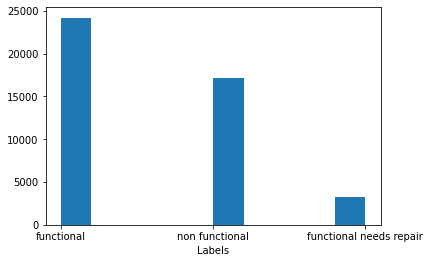

In [ ]:
plt.hist(pump_data['status_group'])
plt.xlabel('Labels')
plt.show()

Observations on Labels:-

54.3% of all pumps in the data set were found to be functional, while 38.4% were non functional and 7.3% had a status of functional needs repair

##Missing data information 

In [ ]:
#Checking the number of unique values in each column and also if there are any missing values
for column in pump_data:
  class_list = []
  class_list = pump_data[column].unique()
  print('Total entries: ' + str(len(pump_data[column]))  +  ' The unique entries in the column ' + str( column) +  ' are ' + str(len(class_list)))
  print("Number of missing values are: ", pump_data[column].isna().sum())
  if (column ==  'latitude'):
    print("Number of garbage values = 2e-8 are: " + str((pump_data[column] == -2e-8 ).sum()))
  if (pump_data[column].dtype == 'object'):
    print("Number of zero values are: ", (pump_data[column] == '0').astype(int).sum())
  else:
    print("Number of zero values are: ", (pump_data[column] == 0).astype(int).sum())
 


Total entries: 44550 The unique entries in the column id are 44550
Number of missing values are:  0
Number of zero values are:  0
Total entries: 44550 The unique entries in the column amount_tsh are 85
Number of missing values are:  0
Number of zero values are:  31231
Total entries: 44550 The unique entries in the column date_recorded are 346
Number of missing values are:  0
Number of zero values are:  0
Total entries: 44550 The unique entries in the column funder are 1652
Number of missing values are:  2793
Number of zero values are:  572
Total entries: 44550 The unique entries in the column gps_height are 2396
Number of missing values are:  0
Number of zero values are:  15441
Total entries: 44550 The unique entries in the column installer are 1855
Number of missing values are:  2807
Number of zero values are:  572
Total entries: 44550 The unique entries in the column longitude are 43155
Number of missing values are:  0
Number of zero values are:  1354
Total entries: 44550 The unique 

Observations:-


*  Categorical Missing values in 'Funder', 'Installer', 'Subvillage', 'Public_meeting', 'Scheme Management',  and 'Permit' need to be imputed if we include them in our model as features

*  Numerical Missing values in 'amount_tsh', 'gps_height', 'construction year', 'population'
*   The column 'Recorded_by' and 'Scheme name' can be removed as 'recorded by' is same for every data point and doesn't help our model and Scheme name has to many missing values. Also num_private is heavily skewed towards 0 and column 'id' is just for administrative purpose so we can drop them

* The column wpt_name can also be dropped as it has lot of unique values for a categorical kind of variable and will not have enough examples of each category

*     Many features have garbage values like 0 which should also be considered as unknown or nan



*   Latitude and Longitude has about 1354 pair of values as 2e-8 and 0 which needs to be taken care off.










## Data Cleaning

In [ ]:
####################################################
## Basic data cleaning - Phase 1

#Removing the column 'id', recorded_by", "scheme_name" and "num_private"
del pump_data['id']
del pump_data['recorded_by']
del pump_data['scheme_name']
del pump_data['num_private']
del pump_data['wpt_name']
del test_pump_data['id']
del test_pump_data['recorded_by']
del test_pump_data['scheme_name']
del test_pump_data['num_private']
del test_pump_data['wpt_name']

#Replace all missing values with Nan
pump_data = pump_data.fillna(np.nan)
test_pump_data = test_pump_data.fillna(np.nan)

# Replace the invalid garbage values with NaNs for numerical features.
invalid_values = {'amount_tsh':0,
                     'gps_height':0,
                     'longitude':0,
                     'latitude': -2e-08,
                     'population': 0,
                     'construction_year': 0}
            
for numerical_feature, null_val in invalid_values.items():
  pump_data[numerical_feature] = pump_data[numerical_feature].replace(null_val,np.nan)
  test_pump_data[numerical_feature] = test_pump_data[numerical_feature].replace(null_val,np.nan)

  #Replace invalid categorical values with Nans for categorical features.
invalid_categoricals = {'funder':0,
                                   'installer': 0}
for categorical_feature, null_val in invalid_categoricals.items():
  pump_data[categorical_feature] = pump_data[categorical_feature].replace(null_val,np.nan)
  test_pump_data[categorical_feature] = test_pump_data[categorical_feature].replace(null_val,np.nan)



#Variable Transformation, Feature Engineering, Feature Selection or Elimination

In [ ]:
#do something about the year feature try to convert that using datatime. Only use the year part of date recorded as an int and discard the month and day.
# Change date_recorded to year_recorded and drop date_recorded.
pump_data['date_recorded'] = pd.to_datetime(pump_data['date_recorded'], yearfirst=True)
test_pump_data['date_recorded'] = pd.to_datetime(pump_data['date_recorded'], yearfirst=True)

In [ ]:
pump_data['year_recorded'] = [date.year for date in pump_data['date_recorded']]
pump_data['year_recorded'] = pump_data['year_recorded'].astype(int)
del pump_data['date_recorded']

test_pump_data['year_recorded'] = [date.year for date in test_pump_data['date_recorded']]
test_pump_data['year_recorded'] = test_pump_data['year_recorded'].astype(int)
del test_pump_data['date_recorded']

## Impute Categorical Features having missing values using simple imputer

To impute categorical features we can choose common techniques like most frequent as the number of missing values are comparitively small and also randomly distributed

In [ ]:
from sklearn.impute import SimpleImputer
missing_category_list = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management','permit']
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent') 
test_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

pump_data2 = pump_data.copy()
test_pump_data2 = test_pump_data.copy()

imputer = imputer.fit(pump_data2)
test_imputer = test_imputer.fit(test_pump_data2)

pump_data2[:] = imputer.transform(pump_data2)
test_pump_data2[:] = test_imputer.transform(test_pump_data2)

In [ ]:
for column in missing_category_list:
  pump_data[column] = pump_data2[column]
  test_pump_data[column] = test_pump_data2[column]

## Do ordinal encoding of categorical variables

The features region code and district can be considered as a categorical variable instead of a numerical one due to its small number of unique values.

In [ ]:
pump_data['region_code'] = pump_data['region_code'].astype(str)
pump_data['district_code'] = pump_data['district_code'].astype(str)
test_pump_data['region_code'] = test_pump_data['region_code'].astype(str)
test_pump_data['district_code'] = test_pump_data['district_code'].astype(str)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
test_encoder = OrdinalEncoder()

pump_data3 = pump_data.copy()
test_pump_data3 = test_pump_data.copy()

categoricals = pump_data3.select_dtypes(exclude='number').columns.tolist()
test_categoricals = test_pump_data3.select_dtypes(exclude='number').columns.tolist()

encoder.fit(pump_data3[categoricals])
test_encoder.fit(test_pump_data3[test_categoricals])

pump_data3[categoricals] = encoder.transform(pump_data3[categoricals]) 
pump_data[categoricals] = pump_data3[categoricals] 

test_pump_data3[test_categoricals] = test_encoder.transform(test_pump_data3[test_categoricals]) 
test_pump_data[test_categoricals] = test_pump_data3[test_categoricals] 


## Impute the numerical values using an Iterative Imputer

Since some of the numerical features have a lot of missing values hence an Iterative Imputer will work better which estimates the missing values using other features

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state = 0)
test_imputer = IterativeImputer(random_state = 0)
 
imputer.fit(pump_data)
test_imputer.fit(test_pump_data)
 
pump_data[:] = imputer.transform(pump_data)
pump_data['construction_year'] = pump_data['construction_year'].astype(int)
 
test_pump_data[:] = test_imputer.transform(test_pump_data)
test_pump_data['construction_year'] = test_pump_data['construction_year'].astype(int)

## Create a new Age_of_pump feature using construction year and year_recorded feature
Such a feature can account for the time that has been passed since the last maintainence check. We can delete the features construction year and year_recorded from our dataset

In [ ]:
pump_data['Age_of_pump'] = pump_data['year_recorded'] - pump_data['construction_year']
test_pump_data['Age_of_pump'] = test_pump_data['year_recorded'] - test_pump_data['construction_year']
del pump_data['year_recorded']
del pump_data['construction_year']
del test_pump_data['year_recorded']
del test_pump_data['construction_year']

In [ ]:
pump_data

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Age_of_pump
0,7.000000,380.0,1203.000000,181.0,37.228664,-3.256505,5.0,7555.0,6.0,15.0,10.0,16.0,947.0,90.000000,1.0,10.0,1.0,3.0,1.0,0.0,9.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,0.0,5.0
1,1204.206855,151.0,1409.000000,177.0,34.615481,-9.972601,1.0,3474.0,3.0,2.0,10.0,51.0,879.0,70.000000,0.0,4.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,2.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,0.0,27.0
2,1302.594588,398.0,1572.000000,356.0,36.658778,-3.321529,5.0,9062.0,0.0,11.0,3.0,0.0,688.0,150.000000,1.0,7.0,1.0,3.0,1.0,0.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,8.0,6.0,0.0,1.0,1.0,2.0,11.0
3,1185.442707,265.0,1160.708828,385.0,33.628025,-8.860795,6.0,1543.0,10.0,3.0,3.0,60.0,386.0,188.476368,1.0,7.0,1.0,3.0,1.0,0.0,11.0,4.0,2.0,0.0,6.0,2.0,2.0,2.0,6.0,4.0,1.0,1.0,1.0,0.0,17.0
4,300.000000,265.0,1283.000000,385.0,37.655509,-3.669777,5.0,12055.0,6.0,15.0,3.0,84.0,1878.0,34.000000,1.0,7.0,0.0,3.0,1.0,0.0,7.0,4.0,3.0,1.0,6.0,2.0,2.0,2.0,8.0,6.0,0.0,1.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,1454.982084,1625.0,1173.779326,1504.0,32.383715,-3.457624,3.0,580.0,17.0,8.0,5.0,25.0,1857.0,593.223697,1.0,7.0,1.0,8.0,5.0,1.0,11.0,4.0,6.0,6.0,3.0,3.0,1.0,1.0,7.0,5.0,0.0,4.0,3.0,0.0,11.0
44546,1226.830184,246.0,1365.233402,330.0,31.615509,-2.738682,4.0,2899.0,4.0,9.0,18.0,12.0,567.0,417.827759,1.0,8.0,1.0,0.0,0.0,1.0,10.0,4.0,3.0,1.0,6.0,2.0,1.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,19.0
44547,1045.255053,398.0,969.000000,514.0,35.134412,-10.676062,7.0,8393.0,16.0,1.0,5.0,61.0,637.0,60.000000,1.0,7.0,1.0,3.0,1.0,0.0,7.0,4.0,6.0,6.0,6.0,2.0,3.0,3.0,8.0,6.0,0.0,1.0,1.0,0.0,36.0
44548,200.000000,26.0,1269.000000,21.0,37.886287,-4.390882,5.0,10107.0,6.0,15.0,5.0,101.0,1921.0,80.000000,1.0,11.0,1.0,3.0,1.0,0.0,7.0,4.0,3.0,1.0,6.0,2.0,2.0,2.0,8.0,6.0,0.0,1.0,1.0,0.0,2.0


## Corrrelation Analysis

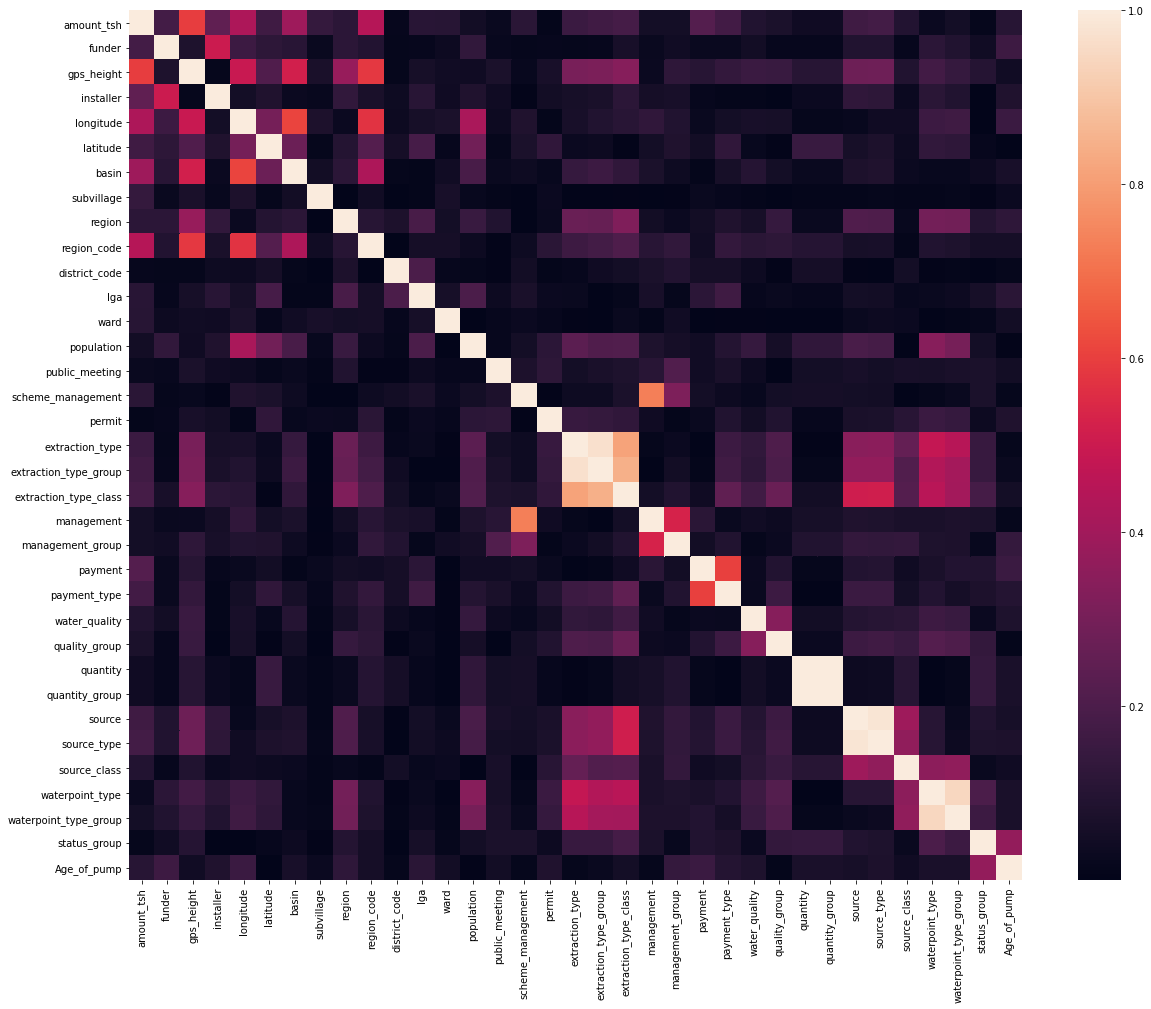

In [ ]:
corrMatrix = pump_data.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(abs(corrMatrix),annot= False)
plt.show()

* As we can see from the above correlation matrix that 'extraction_type_group' and 'extraction_type' are highly correlated so one of them can be removed. 
   
* Also 'quantity' and 'quantity_group' are highly correlated. Therefore we can remove 'quantity' feature 



*  Similarly 'source_type' and 'source' are highly correlated and one of them can be removed and similarly for 'waterpoint_type_group' and 'waterpoint_type'.






In [ ]:
del pump_data['extraction_type_group']
del pump_data['quantity']
del pump_data['source']
del pump_data['waterpoint_type_group']
del test_pump_data['extraction_type_group']
del test_pump_data['quantity']
del test_pump_data['source']
del test_pump_data['waterpoint_type_group']

## Separate the labels from the dataset



* 0 - denotes Functional   
* 1 - denotes Functional but need repairs   
* 2 - denotes Non Functional   





In [ ]:
Labels = pump_data['status_group']
del pump_data['status_group']

# Declaration of ML frameworks(eg:- SVM with gaussian kernel) to be used with a prior hypothesis of which method is likely to work better due to insights from previous steps. Declare some resources on the net that you read to find out which ML framework is better suited for which type of data.



*   https://www.kdnuggets.com/2020/05/guide-choose-right-machine-learning-algorithm.html#:~:text=SVM%20is%20better%20suited%20in,types%20of%20machine%20learning%20problems.



*   https://www.upgrad.com/blog/bagging-vs-boosting/#:~:text=Bagging%20and%20Boosting%3A%20Differences,-As%20we%20said&text=Boosting%20is%20a%20method%20of,model%20receives%20an%20equal%20weight.





Following frameworks are used for prediction

1. SVM with Gaussian Kernel
2. Boosting
3. Random Forest classifier(Bagging)
4. Decision Trees classifier

Out of the above 4 hypothesis is that Bagging method will work well for this data since boosting method merges different predictions and is applied when we want to reduce variance on test data and we already have low bias. We have lots of data so there is less possibility of having high bias. We cannot use SVM here because the number of observations are too high and it is not suitable for large datasets

Running The four classifiers with random hyperparamters

## SVM with Gaussian Kernel

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_classifier = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))
svm_classifier.fit(pump_data,Labels)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svm_classifier.predict(pump_data)
accuracy_score(Labels, y_pred)

0.8293153759820426

SVM with kernel is taking longer time to converge. Not appropriate for this dataset

## Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelxgb = GradientBoostingClassifier(n_estimators = 60, learning_rate = 1.0, max_depth = 6,random_state = 0)
modelxgb.fit(pump_data,Labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = modelxgb.predict(pump_data)
accuracy_score(Labels, y_pred)

0.9592143658810326

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_f_classifier = RandomForestClassifier(max_depth = 15, random_state = 0)
random_f_classifier.fit(pump_data,Labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = random_f_classifier.predict(pump_data)
accuracy_score(Labels, y_pred)

0.9158249158249159

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_clf = DecisionTreeClassifier(max_depth = 15)
decision_clf.fit(pump_data,Labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = decision_clf.predict(pump_data)
accuracy_score(Labels, y_pred)

0.9081032547699215

#Diligent Hyperparameter tuning for at least three frameworks

## Hyperparameter Tuning for Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
num_of_estimators = [50,100]
max_depth = [15,30]

hyperparameters = {'n_estimators': num_of_estimators, 'max_depth': max_depth}

from sklearn.ensemble import GradientBoostingClassifier
boosting_classifier = GradientBoostingClassifier()
boosting_search = GridSearchCV(estimator = boosting_classifier, param_grid = hyperparameters, scoring = 'f1_micro',n_jobs = -1,cv = 3)
boosting_search.fit(np.array(pump_data),np.squeeze(Labels))
print("Best Boosting parameeters are: ")
print(boosting_search.best_params_)
print("Score for the best model is: " + str(boosting_search.best_score_))

Best Boosting parameeters are: 
{'max_depth': 15, 'n_estimators': 100}
Score for the best model is: 0.8591021324354658


## Hyperparameter Tuning for Random Forests

In [ ]:
from sklearn.model_selection import GridSearchCV
num_of_estimators = [25,50,75,100]
max_depth = [15,20,30,35]

hyperparameters = {'n_estimators': num_of_estimators, 'max_depth': max_depth}

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_search = GridSearchCV(estimator = rf_classifier, param_grid = hyperparameters, scoring = 'f1_micro',n_jobs = -1,cv = 3)
rf_search.fit(np.array(pump_data),Labels)
print("Best Random Forests parameeters are: ")
print(rf_search.best_params_)
print("Score for the best model is: " + str(rf_search.best_score_))

Best Random Forests parameeters are: 
{'max_depth': 35, 'n_estimators': 100}
Score for the best model is: 0.8600224466891134


## Hyperparameter Tuning for Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
max_depth = [15,25,30,45]

hyperparameters = { 'max_depth': max_depth}

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_search = GridSearchCV(estimator = dt_classifier, param_grid = hyperparameters, scoring = 'f1_micro',n_jobs = -1,cv = 3)
dt_search.fit(np.array(pump_data), np.squeeze(Labels))
print("Best Decision Tree parameeters are: ")
print(dt_search.best_params_)
print("Score for the best model is: " + str(dt_search.best_score_))


Best Decision Tree parameeters are: 
{'max_depth': 15}
Score for the best model is: 0.8220202020202021


#Determination of the relative order of importance of variables, and perhaps a second round of feature selection.

## Important features for Gradient Boosting Classifier

Feature: 0, Score: 0.03406
Feature: 1, Score: 0.01718
Feature: 2, Score: 0.03216
Feature: 3, Score: 0.01341
Feature: 4, Score: 0.08478
Feature: 5, Score: 0.05062
Feature: 6, Score: 0.00222
Feature: 7, Score: 0.01769
Feature: 8, Score: 0.01081
Feature: 9, Score: 0.05540
Feature: 10, Score: 0.00891
Feature: 11, Score: 0.02094
Feature: 12, Score: 0.01469
Feature: 13, Score: 0.04845
Feature: 14, Score: 0.00070
Feature: 15, Score: 0.00384
Feature: 16, Score: 0.00349
Feature: 17, Score: 0.00643
Feature: 18, Score: 0.03994
Feature: 19, Score: 0.01182
Feature: 20, Score: 0.00118
Feature: 21, Score: 0.00749
Feature: 22, Score: 0.01090
Feature: 23, Score: 0.00185
Feature: 24, Score: 0.00165
Feature: 25, Score: 0.18863
Feature: 26, Score: 0.00957
Feature: 27, Score: 0.00318
Feature: 28, Score: 0.05643
Feature: 29, Score: 0.24158


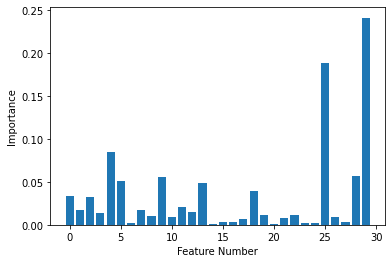

In [ ]:
GBC_important_features = modelxgb.feature_importances_
for i,v in enumerate(GBC_important_features):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(GBC_important_features))], GBC_important_features)
plt.xlabel('Feature Number')
plt.ylabel('Importance')
plt.show()

## Important Features for Random Forest Classifier

Feature: 0, Score: 0.03805
Feature: 1, Score: 0.02388
Feature: 2, Score: 0.04407
Feature: 3, Score: 0.02004
Feature: 4, Score: 0.06305
Feature: 5, Score: 0.04873
Feature: 6, Score: 0.01344
Feature: 7, Score: 0.02149
Feature: 8, Score: 0.02323
Feature: 9, Score: 0.02706
Feature: 10, Score: 0.01600
Feature: 11, Score: 0.02695
Feature: 12, Score: 0.02195
Feature: 13, Score: 0.05057
Feature: 14, Score: 0.00345
Feature: 15, Score: 0.01147
Feature: 16, Score: 0.00562
Feature: 17, Score: 0.02228
Feature: 18, Score: 0.03741
Feature: 19, Score: 0.01255
Feature: 20, Score: 0.00559
Feature: 21, Score: 0.01993
Feature: 22, Score: 0.02279
Feature: 23, Score: 0.00725
Feature: 24, Score: 0.00740
Feature: 25, Score: 0.12791
Feature: 26, Score: 0.01415
Feature: 27, Score: 0.00538
Feature: 28, Score: 0.05754
Feature: 29, Score: 0.20077


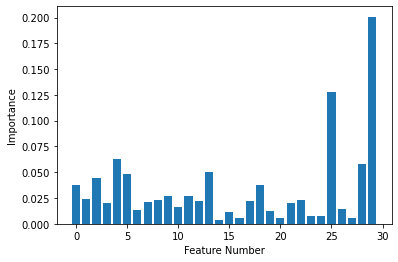

In [ ]:
rf_important_features = random_f_classifier.feature_importances_
for i,v in enumerate(rf_important_features):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(rf_important_features))], rf_important_features)
plt.xlabel('Feature Number')
plt.ylabel('Importance')
plt.show()

## Important Features for Decision Tree Classifier

Feature: 0, Score: 0.02912
Feature: 1, Score: 0.02880
Feature: 2, Score: 0.03891
Feature: 3, Score: 0.01296
Feature: 4, Score: 0.06880
Feature: 5, Score: 0.05955
Feature: 6, Score: 0.00463
Feature: 7, Score: 0.01751
Feature: 8, Score: 0.00993
Feature: 9, Score: 0.04910
Feature: 10, Score: 0.01522
Feature: 11, Score: 0.02989
Feature: 12, Score: 0.01927
Feature: 13, Score: 0.04812
Feature: 14, Score: 0.00253
Feature: 15, Score: 0.00490
Feature: 16, Score: 0.00887
Feature: 17, Score: 0.00634
Feature: 18, Score: 0.03928
Feature: 19, Score: 0.00705
Feature: 20, Score: 0.00759
Feature: 21, Score: 0.01729
Feature: 22, Score: 0.01866
Feature: 23, Score: 0.00371
Feature: 24, Score: 0.00267
Feature: 25, Score: 0.13088
Feature: 26, Score: 0.01258
Feature: 27, Score: 0.00542
Feature: 28, Score: 0.04971
Feature: 29, Score: 0.25069


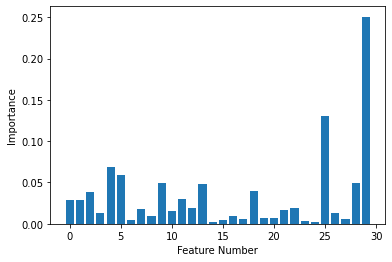

In [ ]:
dt_important_features = decision_clf.feature_importances_
feature_imp_dict = {}
for i,v in enumerate(dt_important_features):
	print('Feature: %0d, Score: %.5f' % (i,v))
  
   
# plot feature importance
plt.bar([x for x in range(len(dt_important_features))], dt_important_features)
plt.xlabel('Feature Number')
plt.ylabel('Importance')
plt.show()

In [ ]:
# In all the three models feature 25 and 29 are having higher importance
most_important_features = [pump_data.columns[25], pump_data.columns[29]]
most_important_features

['quantity_group', 'Age_of_pump']

Observations:-

So the two most important features are 'Age_of_pump' and 'quality_group'

#Visualization of  decision boundaries by either taking the two most important variables into account, or by reducing the input dimensions to two using tools such as t-sne

Applying TSNE to reduce the input dimensions to two which can then by used for visualization of decision boundary

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,learning_rate = 600).fit_transform(pump_data)

In [ ]:
X_embedded
np.save('Embeddings', X_embedded)

In [ ]:
Important_pump_data = pd.DataFrame(X_embedded)
Important_pump_data

,0,1
0,-40.451462,15.067572
1,30.141411,92.674332
2,-86.574074,-15.255998
3,63.272999,30.753569
4,43.603752,-45.968006
...,...,...
44545,50.845642,14.278801
44546,51.287804,88.453125
44547,-87.410728,2.878931
44548,-4.784351,-10.548357


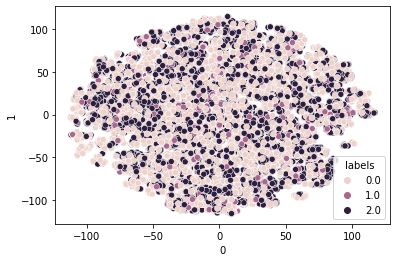

0.946936026936027


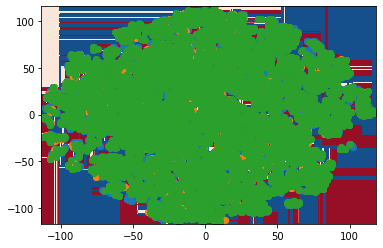

In [ ]:
Important_pump_data['labels'] = Labels

#Visualizing the decision boundary using these two features
sns.scatterplot( x= 0,y= 1, hue='labels', data=Important_pump_data)
plt.show()
del Important_pump_data['labels']
Important_pump_data = Important_pump_data.to_numpy()


model = DecisionTreeClassifier(max_depth = 29)
model.fit(Important_pump_data,Labels)
y_pred = model.predict(X_embedded)
print(accuracy_score(Labels,y_pred))
min1, max1 = [X_embedded[:, 0].min()-1, X_embedded[:, 0].max()+1]
min2, max2 = [X_embedded[:, 1].min()-1, X_embedded[:, 1].max()+1]

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
y_pred = model.predict(grid)
zz = y_pred.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='RdBu')
# create scatter plot for samples from each class
for class_value in range(3):
    # get row indexes for samples with this class
    row_ix = np.where(Labels == class_value)
    # create scatter of these samples
    plt.scatter(Important_pump_data[row_ix, 0], Important_pump_data[row_ix, 1])
    

#Submit the final labels as a CSV file with a single column and no header

Using the model and model parameters with best score obtained after gridsearch & cross validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 35, n_estimators = 100)
model.fit(pump_data,Labels)
del test_pump_data['Unnamed: 0']
test_predictions = model.predict(test_pump_data)

In [ ]:
#Write in a CSV file
test_prediction_dataframe = pd.DataFrame(test_predictions)
test_prediction_dataframe.to_csv('Final_test_predictions.csv')

In [ ]:
len(test_prediction_dataframe)

14850